# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

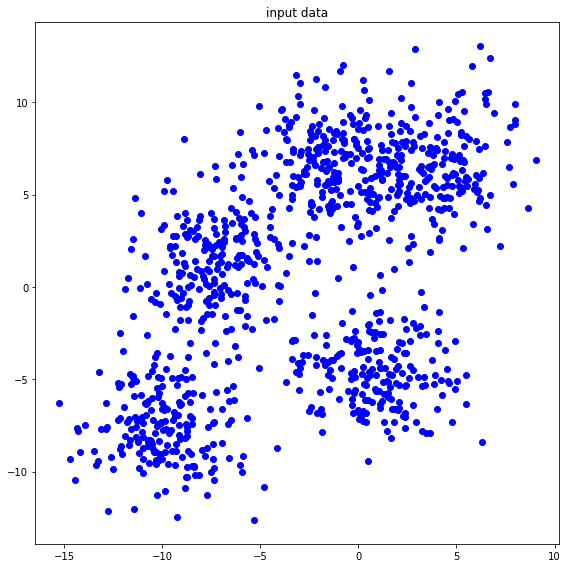

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [12]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = len(feature)
    distance = np.array([])

    for point in feature:
        dist = np.linalg.norm(point - center)
        distance = np.append(distance, np.array([dist]))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [185]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # label_Feature 중에서 label과 같은 데이터의 index가져오기
    label_cluster_index = np.where((label_feature == label) == True)[0]

    if label_cluster_index.size == 0:
        return None
    # if label_cluster_index.size == 1:
    #     print("size: ",label_cluster_index.size)
    #     # print(feature[label_cluster_index - 1])
    #     print(feature[label_cluster_index])
    #     print(feature[label_cluster_index].shape)
    #     print(type(feature[label_cluster_index]))
    
    # 해당 index의 feature의 각 좌표의 평균값 -> centeroid
    feature_x = feature[label_cluster_index, 0]
    feature_y = feature[label_cluster_index, 1] #[[ 6.31076606 -8.37834039]]

    # if label_cluster_index.size == 1:
    #     print(feature_x,feature_y )
    
    centeroid_x = np.average(feature_x)
    centeroid_y = np.average(feature_y)
    centroid = np.array([centeroid_x, centeroid_y])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [186]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature = np.argmin(distance, axis = -1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [203]:
number_cluster          = 2
number_iteration        = 15    # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [204]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
centroid = np.array([])
for i in range(number_iteration):
    distance = np.zeros((number_cluster, len(feature)))
    for j in range(number_cluster):
        center = compute_centroid(feature, label_feature_02, j)
        if center is not None:
            centroid_iteration_02[i,j] = center # 조심하기
        distance[j] = compute_distance(feature, center)

    label_feature_02 = compute_label(distance.T)
    # loss는 결국 거리가 가장 가까운 중심 점이 속한 cluster에 포인트가 속하기때문에 distance에서 가장 가까운 거리를 합하면 됩니다.
    n = len(feature)
    loss_iteration_02[i] = np.sum(distance.T[np.arange(len(feature)), label_feature_02])/n
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [206]:
number_cluster          = 4
number_iteration        = 10     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [207]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    distance = np.zeros((number_cluster, len(feature)))
    for j in range(number_cluster):
        center = compute_centroid(feature, label_feature_04, j)
        if center is not None:
            centroid_iteration_04[i,j] = center
        elif center is None:
            center = centroid_iteration_04[i,j]
        distance[j] = compute_distance(feature, center)
    
    label_feature_04 = compute_label(distance.T)
    n = len(feature)
    loss_iteration_04[i] = np.sum(distance.T[np.arange(len(feature)), label_feature_04])/n


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [209]:
number_cluster          = 8
number_iteration        = 10    # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [210]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    distance = np.zeros((number_cluster, len(feature)))
    for j in range(number_cluster):
        center = compute_centroid(feature, label_feature_08, j)
        if center is not None:
            centroid_iteration_08[i,j] = center
        elif center is None:
            center = centroid_iteration_08[i,j]
        distance[j] = compute_distance(feature, center)
    
    label_feature_08 = compute_label(distance.T)
    n = len(feature)
    loss_iteration_08[i] = np.sum(distance.T[np.arange(len(feature)), label_feature_08])/n

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [221]:
number_cluster          = 16
number_iteration        = 20    # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [222]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    distance = np.zeros((number_cluster, len(feature)))
    for j in range(number_cluster):
        center = compute_centroid(feature, label_feature_16, j)
        if center is not None:
            centroid_iteration_16[i,j] = center
        elif center is None:
            center = centroid_iteration_16[i,j]
        distance[j] = compute_distance(feature, center)
    
    label_feature_16 = compute_label(distance.T)
    n = len(feature)
    loss_iteration_16[i] = np.sum(distance.T[np.arange(len(feature)), label_feature_16])/n
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [224]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [225]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [226]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [227]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [228]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [229]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [230]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [231]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [23]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [24]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [25]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [26]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [27]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [28]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [29]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [30]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  5.0933204564
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  2.8867264896
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  2.1621289204
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  1.6639992259
**************************************************
## [RESULT 05]
**************************************************


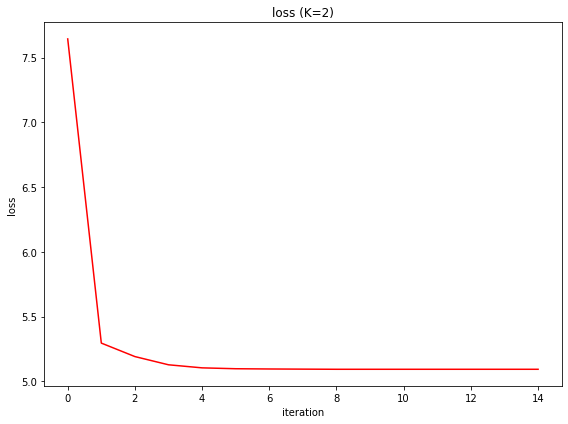

**************************************************
## [RESULT 06]
**************************************************


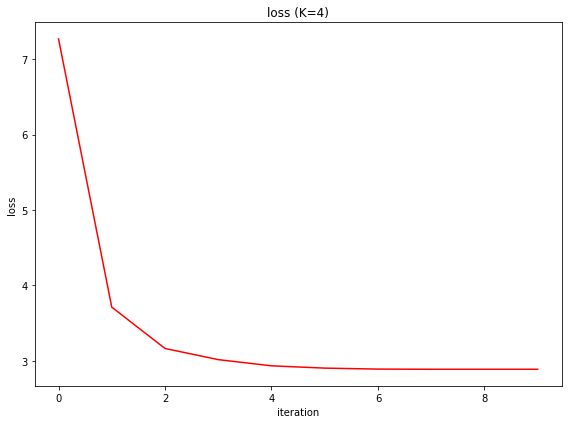

**************************************************
## [RESULT 07]
**************************************************


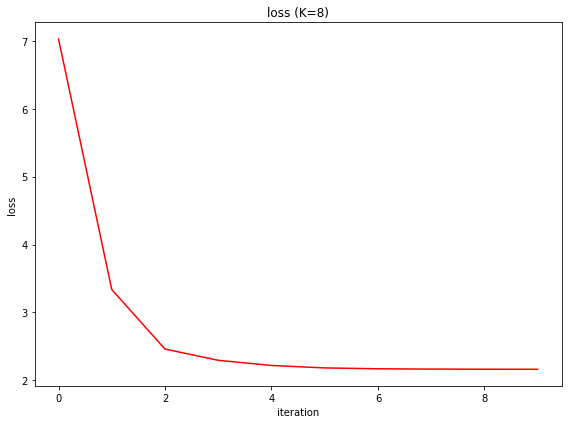

**************************************************
## [RESULT 08]
**************************************************


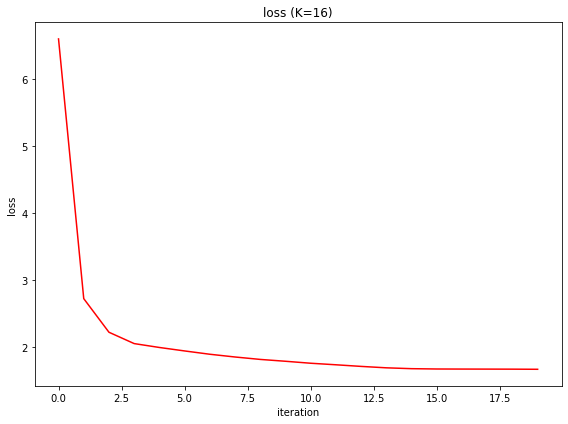

**************************************************
## [RESULT 09]
**************************************************


NameError: name 'function_result_09' is not defined

In [232]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)